# **ANALYSING** **STATE**-**WISE** **COVID**-**19** **DATA** **TO** **ELIMINATE HEALTH DISPARITIES**






# **Data Analytics Project**

# **Group** **Number** - **13**
1.   Pedaballi Rajeswari - 19BCE7120
2.   Savali Deshmukh - 19BCE7348
3.   Yashwanth Reddy - 19BCE7362
4.   Varun Parikh - 19BCE7202



In [ ]:
# Imprting libraries 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
# Machine Learning models 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import average_precision_score, precision_recall_curve 
from sklearn.metrics import auc, plot_precision_recall_curve 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [ ]:
# Loading dataset
train = pd.read_csv("Rural India Status.csv")
train.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33


In [ ]:
train.shape

(36, 8)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [ ]:
train.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.968294e+05,10205.972222,8.746090e+05,12014.416667,1.682222,97.052222,1.265000
std,1.303563e+06,30660.005408,1.262310e+06,23205.834381,3.335660,3.239175,0.564464
min,7.549000e+03,1.000000,7.419000e+03,4.000000,0.010000,81.440000,0.040000
25%,6.981775e+04,213.750000,6.598125e+04,803.750000,0.067500,97.150000,0.947500
50%,4.645165e+05,1062.500000,4.546995e+05,5322.500000,0.570000,98.200000,1.320000
75%,9.980822e+05,7369.500000,9.826742e+05,13579.500000,1.337500,98.597500,1.607500
max,6.401213e+06,175695.000000,6.201168e+06,135255.000000,18.190000,99.920000,2.720000


In [ ]:
# Checking if any missing values 
train.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [ ]:
train

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33
5,Chandigarh,62035,42,61182,811,0.07,98.62,1.31
6,Chhattisgarh,1003870,1037,989284,13549,0.10,98.55,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10657,4,10649,4,0.04,99.92,0.04
8,Delhi,1437156,471,1411612,25073,0.03,98.22,1.74
9,Goa,172683,884,168622,3177,0.51,97.65,1.84


In [ ]:
train.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

# Visualization

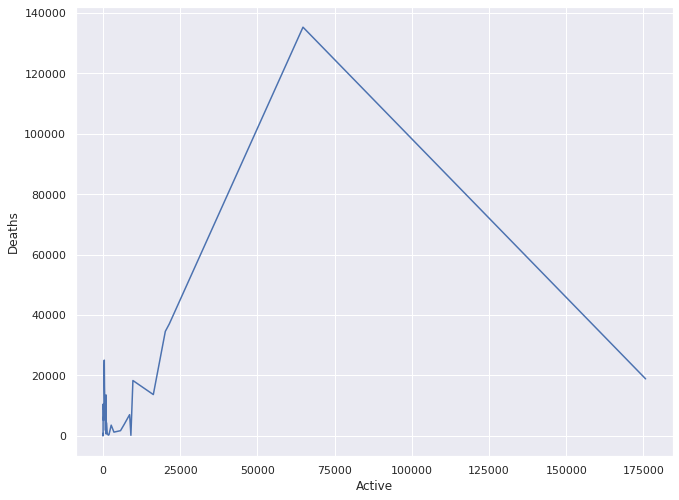

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x=train['Active'],y=train['Deaths'])

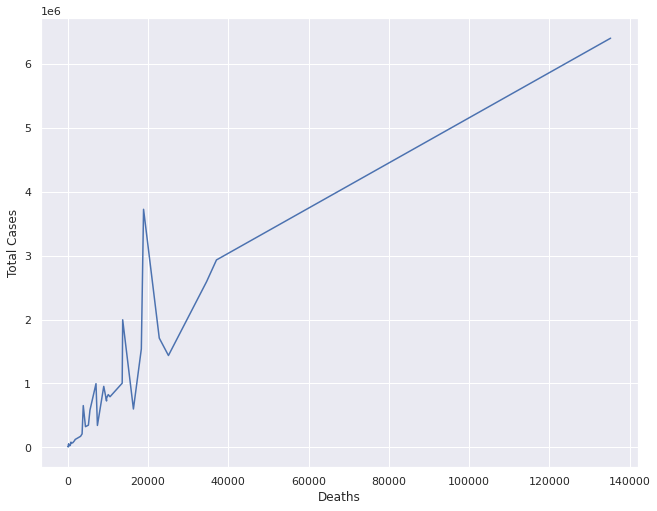

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(y=train['Total Cases'],x=train['Deaths'])

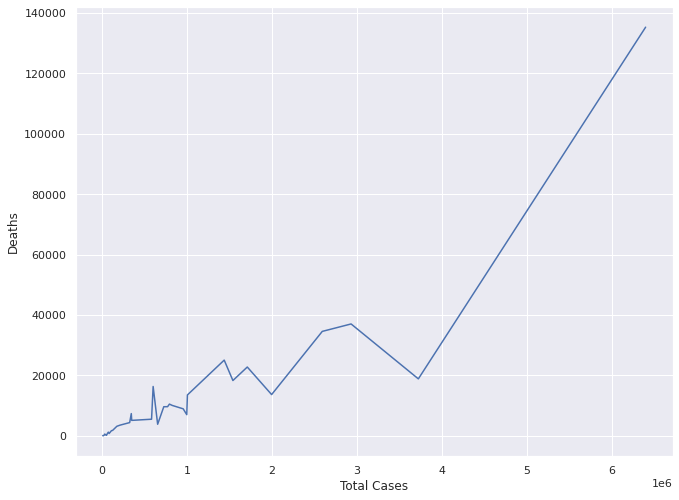

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(y=train['Deaths'],x=train['Total Cases'])

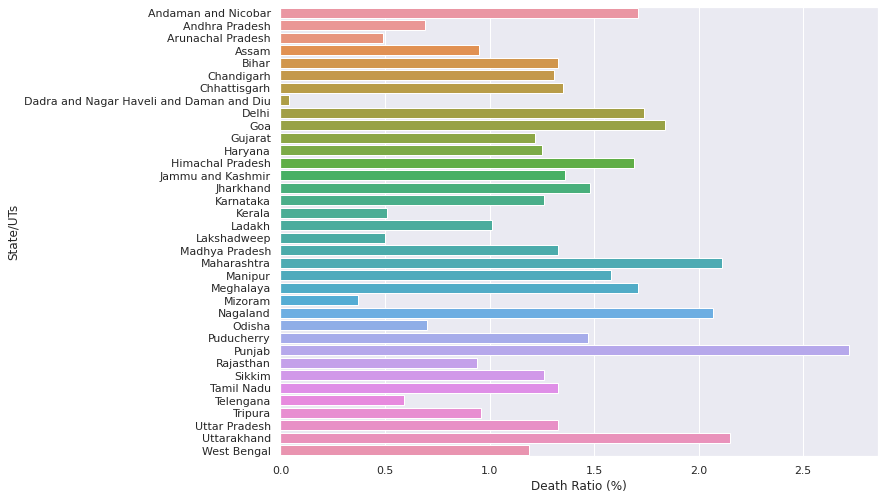

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.barplot(x=train['Death Ratio (%)'],y=train['State/UTs'])

In [ ]:
# Transforming non-numerical values with encoding. 
# No cleaning to be done as there is no null values.
from sklearn import preprocessing
le_ms=preprocessing.LabelEncoder()
train['State/UTs']=le_ms.fit_transform(train['State/UTs'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     int64  
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 2.4 KB


# Model training

In [ ]:
# Model Splitting 
X=train.drop(["Deaths"], axis=1)
Y=train['Deaths']
print(X.shape)
print(Y.shape)

(36, 7)
(36,)


In [ ]:
# train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 7)
(8, 7)
(28,)
(8,)


# Decision Tree

In [ ]:
model1 = DecisionTreeRegressor().fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

5183.75


In [ ]:
y_pred

array([37039., 16345., 13549., 13549.,   185.,   607.,  9649.,   782.])

In [ ]:
print(y_pred.mean())
y_pred_perc = y_pred.mean()

11463.125


In [ ]:
print(y_test.mean())
y_test_perc = y_test.mean()

6519.875


In [ ]:
off_percentage = 100-(y_pred_perc/y_test_perc)*100
print(off_percentage)

-75.81817136064726


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)*100,"%")
print("Precision:", metrics.precision_score(y_test,y_pred)*100,"%")
print("Recall:", metrics.recall_score(y_test,y_pred)*100,"%")

Accuracy: 76.3%
Precision: 82.3%
Recall:: 67.5%


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,y_pred))

4137.75


In [ ]:
y_pred

array([25073,  9649,  4399,  3847, 13671,    51, 10078,  9649])

In [ ]:
print(y_pred.mean())
y_pred_perc = y_pred.mean()

9552.125


In [ ]:
print(y_test.mean())
y_test_perc = y_test.mean()

6519.875


In [ ]:
off_percentage = 100-(y_pred_perc/y_test_perc)*100
print(off_percentage)

-46.50779347763569


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)*100,"%")
print("Precision:", metrics.precision_score(y_test,y_pred)*100,"%")
print("Recall:", metrics.recall_score(y_test,y_pred)*100,"%")

Accuracy: 92%
Precision: 90.3%
Recall:: 86.1%


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred=model3.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test,y_pred))

1996.625


In [ ]:
y_pred

array([13671,  3847,  3557,  8954,   185,     4,  9649,   185])

In [ ]:
print(y_pred.mean())
y_pred_perc = y_pred.mean()

5006.5


In [ ]:
print(y_test.mean())
y_test_perc = y_test.mean()

6519.875


In [ ]:
off_percentage = 100-(y_pred_perc/y_test_perc)*100
print(off_percentage)

23.211718016066257


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)*100,"%")
print("Precision:", metrics.precision_score(y_test,y_pred)*100,"%")
print("Recall:", metrics.recall_score(y_test,y_pred)*100,"%")

Accuracy: 80.6%
Precision: 82%
Recall:: 87%
